In [2]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [14]:
all_data_df = pd.read_excel('/Users/eveyhuang/Documents/NICO/gemini_code/data/all_data_df_sm.xlsx')

In [18]:
# Define feature columns (exclude outcome variables and identifiers)
feature_cols = [col for col in all_data_df.columns if col not in 
                ['conference', 'session', 'num_teams', 'num_funded_teams', 'has_teams', 'has_funded_teams']]

## Check distribuion and relationship with outcome variables

Creating feature visualizations...
Processing feature 1/26: num_members
Processing feature 2/26: meeting_length
Processing feature 3/26: num_interruption
Processing feature 4/26: percent_time_screenshare
Processing feature 5/26: num_idea_management
Processing feature 6/26: num_information_seeking
Processing feature 7/26: num_knowledge_sharing
Processing feature 8/26: num_evaluation_practices
Processing feature 9/26: num_relational_climate
Processing feature 10/26: num_participation_dynamics
Processing feature 11/26: num_coordination_decision
Processing feature 12/26: num_integration_practices
Processing feature 13/26: mean_score_idea_management
Processing feature 14/26: mean_score_information_seeking
Processing feature 15/26: mean_score_knowledge_sharing
Processing feature 16/26: mean_score_evaluation_practices
Processing feature 17/26: mean_score_relational_climate
Processing feature 18/26: mean_score_participation_dynamics
Processing feature 19/26: mean_score_coordination_decision
Pr

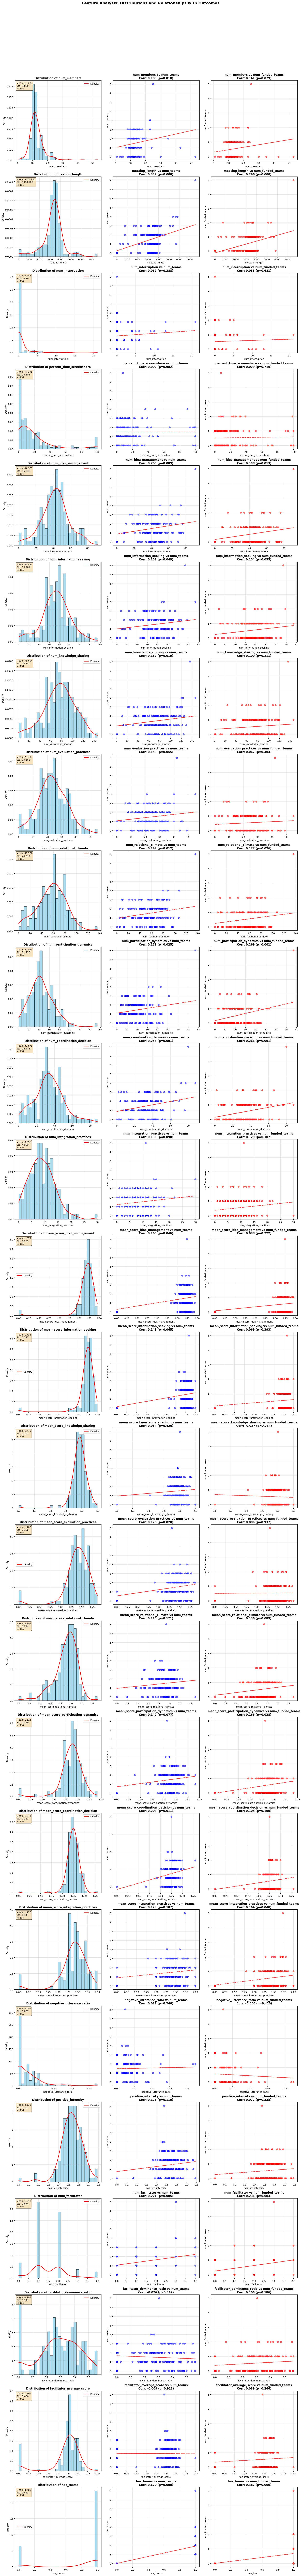

Visualization saved as 'feature_analysis_comprehensive.png'


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')


# Set up the plotting style
plt.style.use('default')
sns.set_palette("husl")

def create_feature_visualizations(df, feature_cols, outcome_vars=['num_teams', 'num_funded_teams']):
    """
    Create comprehensive visualizations for each feature:
    1. Distribution plot (histogram + density)
    2. Scatter plot vs num_teams
    3. Scatter plot vs num_funded_teams
    """
    
    # Calculate number of rows needed (3 plots per feature)
    n_features = len(feature_cols)
    n_cols = 3  # distribution, scatter1, scatter2
    n_rows = n_features
    
    # Create the main figure
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6*n_features))
    fig.suptitle('Feature Analysis: Distributions and Relationships with Outcomes', 
                 fontsize=16, fontweight='bold', y=0.98)
    
    for i, feature in enumerate(feature_cols):
        print(f"Processing feature {i+1}/{n_features}: {feature}")
        
        # Get the data for this feature
        feature_data = df[feature].dropna()
        
        # Skip if no valid data
        if len(feature_data) == 0:
            print(f"  Skipping {feature}: No valid data")
            continue
            
        # 1. Distribution plot (left column)
        ax1 = axes[i, 0]
        
        # Create histogram and density plot
        ax1.hist(feature_data, bins=30, alpha=0.7, density=True, color='skyblue', edgecolor='black')
        
        # Add density curve
        try:
            from scipy.stats import gaussian_kde
            kde = gaussian_kde(feature_data)
            x_range = np.linspace(feature_data.min(), feature_data.max(), 100)
            ax1.plot(x_range, kde(x_range), 'r-', linewidth=2, label='Density')
        except:
            pass
        
        ax1.set_title(f'Distribution of {feature}', fontweight='bold')
        ax1.set_xlabel(feature)
        ax1.set_ylabel('Density')
        ax1.grid(True, alpha=0.3)
        ax1.legend()
        
        # Add statistics text
        stats_text = f'Mean: {feature_data.mean():.3f}\nStd: {feature_data.std():.3f}\nN: {len(feature_data)}'
        ax1.text(0.02, 0.98, stats_text, transform=ax1.transAxes, 
                verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
        
        # 2. Scatter plot vs num_teams (middle column)
        ax2 = axes[i, 1]
        
        # Create scatter plot
        scatter = ax2.scatter(df[feature], df['num_teams'], alpha=0.6, s=50, c='blue')
        
        # Add trend line
        try:
            z = np.polyfit(df[feature].dropna(), df['num_teams'].dropna(), 1)
            p = np.poly1d(z)
            ax2.plot(df[feature].dropna(), p(df[feature].dropna()), "r--", alpha=0.8, linewidth=2)
        except:
            pass
        
        # Calculate correlation
        try:
            corr, p_val = stats.pearsonr(df[feature].dropna(), df['num_teams'].dropna())
            ax2.set_title(f'{feature} vs num_teams\nCorr: {corr:.3f} (p={p_val:.3f})', fontweight='bold')
        except:
            ax2.set_title(f'{feature} vs num_teams', fontweight='bold')
        
        ax2.set_xlabel(feature)
        ax2.set_ylabel('num_teams')
        ax2.grid(True, alpha=0.3)
        
        # 3. Scatter plot vs num_funded_teams (right column)
        ax3 = axes[i, 2]
        
        # Create scatter plot
        scatter = ax3.scatter(df[feature], df['num_funded_teams'], alpha=0.6, s=50, c='red')
        
        # Add trend line
        try:
            z = np.polyfit(df[feature].dropna(), df['num_funded_teams'].dropna(), 1)
            p = np.poly1d(z)
            ax3.plot(df[feature].dropna(), p(df[feature].dropna()), "r--", alpha=0.8, linewidth=2)
        except:
            pass
        
        # Calculate correlation
        try:
            corr, p_val = stats.pearsonr(df[feature].dropna(), df['num_funded_teams'].dropna())
            ax3.set_title(f'{feature} vs num_funded_teams\nCorr: {corr:.3f} (p={p_val:.3f})', fontweight='bold')
        except:
            ax3.set_title(f'{feature} vs num_funded_teams', fontweight='bold')
        
        ax3.set_xlabel(feature)
        ax3.set_ylabel('num_funded_teams')
        ax3.grid(True, alpha=0.3)
    
    # Adjust layout
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    plt.show()
    
    return fig

# Create the visualizations
print("Creating feature visualizations...")
fig = create_feature_visualizations(all_data_df, feature_cols)

# Save the figure
fig.savefig('feature_analysis_comprehensive.png', dpi=300, bbox_inches='tight')
print("Visualization saved as 'feature_analysis_comprehensive.png'")

## Check multicolinearity and address

In [15]:
# Check for perfect correlations first
correlation_matrix = all_data_df[feature_cols].corr()
print("Checking for perfect correlations (|r| = 1.0):")
perfect_corrs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = abs(correlation_matrix.iloc[i, j])
        if corr_val > 0.99:  # Very high correlation
            perfect_corrs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], corr_val))

if perfect_corrs:
    print("Found very high correlations:")
    for feat1, feat2, corr in perfect_corrs:
        print(f"{feat1} <-> {feat2}: {corr:.6f}")
else:
    print("No perfect correlations found")

KeyError: "['facilitator_high_quality_ratio'] not in index"

In [9]:
# Check for constant or near-constant variables
print("Checking for constant/near-constant variables:")
for col in feature_cols:
    unique_vals = all_data_df[col].nunique()
    std_val = all_data_df[col].std()
    if unique_vals <= 1:
        print(f"{col}: CONSTANT (only {unique_vals} unique values)")
    elif std_val < 1e-10:
        print(f"{col}: NEAR CONSTANT (std = {std_val:.2e})")
    elif unique_vals < 5:
        print(f"{col}: LOW VARIANCE ({unique_vals} unique values, std = {std_val:.6f})")

Checking for constant/near-constant variables:


In [10]:
# Check data types and basic statistics
print("Data types and basic statistics:")
print(all_data_df[feature_cols].dtypes.value_counts())
print("\nBasic statistics:")
print(all_data_df[feature_cols].describe())

Data types and basic statistics:
int64      18
float64    15
Name: count, dtype: int64

Basic statistics:
       num_interruption  percent_time_screenshare  num_idea_management  \
count        157.000000                157.000000           157.000000   
mean           0.955414                 19.270456            42.324841   
std            2.878621                 25.503108            16.038102   
min            0.000000                  0.000000             0.000000   
25%            0.000000                  2.292523            35.000000   
50%            0.000000                  9.858765            43.000000   
75%            0.000000                 23.676640            51.000000   
max           21.000000                100.000000            91.000000   

       num_information_seeking  num_knowledge_sharing  \
count               157.000000             157.000000   
mean                 36.433121              75.694268   
std                  13.761370              28.749730   

In [12]:
# Check for linear dependencies using matrix rank
from numpy.linalg import matrix_rank

# Convert to numpy array and check rank
X_array = all_data_df[feature_cols].values
print(f"Matrix rank: {matrix_rank(X_array)}")
print(f"Number of features: {len(feature_cols)}")
print(f"Number of observations: {len(all_data_df)}")

if matrix_rank(X_array) < len(feature_cols):
    print("WARNING: Matrix is rank deficient - linear dependencies exist!")

Matrix rank: 25
Number of features: 25
Number of observations: 157


In [16]:

# Define feature columns (exclude outcome variables and identifiers)
feature_cols = [col for col in all_data_df.columns if col not in 
                ['conference', 'session', 'num_teams', 'num_funded_teams', 'has_teams', 
                'has_funded_teams','num_members', 'meeting_length']]

# Check for missing values
print("Missing values per column:")
print(all_data_df[feature_cols].isnull().sum())


# Check multicollinearity using VIF (Variance Inflation Factor)
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df, features):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = features
    vif_data["VIF"] = [variance_inflation_factor(df[features].values, i) 
                       for i in range(len(features))]
    return vif_data

# Calculate VIF for all features
vif_results = calculate_vif(all_data_df, feature_cols)
print("\nVIF Results:")
print(vif_results.sort_values('VIF', ascending=False))

# Remove features with VIF > 10 (high multicollinearity)
high_vif_features = vif_results[vif_results['VIF'] > 10]['Feature'].tolist()
print(f"\nFeatures with VIF > 10 (high multicollinearity): {high_vif_features}")

# Create final feature set
final_features = [col for col in feature_cols if col not in high_vif_features]
print(f"\nFinal feature set ({len(final_features)} features): {final_features}")

Missing values per column:
num_interruption                     0
percent_time_screenshare             0
num_idea_management                  0
num_information_seeking              0
num_knowledge_sharing                0
num_evaluation_practices             0
num_relational_climate               0
num_participation_dynamics           0
num_coordination_decision            0
num_integration_practices            0
mean_score_idea_management           0
mean_score_information_seeking       0
mean_score_knowledge_sharing         0
mean_score_evaluation_practices      0
mean_score_relational_climate        0
mean_score_participation_dynamics    0
mean_score_coordination_decision     0
mean_score_integration_practices     0
negative_utterance_ratio             0
positive_intensity                   0
num_facilitator                      0
facilitator_dominance_ratio          0
facilitator_average_score            0
dtype: int64

VIF Results:
                              Feature         VIF

## Linear Regression

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, permutation_test_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, mean_squared_error, roc_auc_score, roc_curve, classification_report, confusion_matrix
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.utils import resample
import warnings
warnings.filterwarnings('ignore')



# Feature selection - keep only low-VIF features
selected_features = feature_cols
# Prepare data
X = all_data_df[selected_features]
y_teams = all_data_df['num_teams']
y_funded = all_data_df['num_funded_teams']
y_has_team = all_data_df['has_teams']
y_has_funded = all_data_df['has_funded_teams']

print("=== COMPREHENSIVE REGRESSION ANALYSIS ===")
print(f"Sample size: {len(all_data_df)}")
print(f"Features: {selected_features}")
print(f"Outcomes: num_teams, num_funded_teams, has_teams, has_funded_teams")
print("\n" + "="*80)

# 1. STANDARDIZE ALL FEATURES FOR COMPARABLE COEFFICIENTS
print("\n1. FEATURE STANDARDIZATION")
print("-" * 50)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=selected_features)

print("Features standardized (mean=0, std=1)")
print("Standardized feature statistics:")
print(X_scaled_df.describe().round(3))

# 2. LINEAR REGRESSION WITH R-SQUARED AND STANDARDIZED COEFFICIENTS
print("\n\n2. LINEAR REGRESSION ANALYSIS")
print("-" * 50)

# Use standardized features for comparable coefficients
X_with_const = sm.add_constant(X_scaled)
model_teams = sm.OLS(y_teams, X_with_const).fit()
model_funded = sm.OLS(y_funded, X_with_const).fit()

print("A. num_teams Regression Results:")
print(f"R-squared: {model_teams.rsquared:.4f}")
print(f"Adjusted R-squared: {model_teams.rsquared_adj:.4f}")
print(f"F-statistic: {model_teams.fvalue:.4f} (p-value: {model_teams.f_pvalue:.4f})")
print(model_teams.summary())

print("\nB. num_funded_teams Regression Results:")
print(f"R-squared: {model_funded.rsquared:.4f}")
print(f"Adjusted R-squared: {model_funded.rsquared_adj:.4f}")
print(f"F-statistic: {model_funded.fvalue:.4f} (p-value: {model_funded.f_pvalue:.4f})")
print(model_funded.summary())

# Extract coefficients with R-squared
teams_results = pd.DataFrame({
    'Feature': ['Intercept'] + selected_features,
    'Coefficient': model_teams.params,
    'Std_Error': model_teams.bse,
    'P_Value': model_teams.pvalues,
    'Conf_Low': model_teams.conf_int()[0],
    'Conf_High': model_teams.conf_int()[1],
    'Effect_Size': model_teams.params / model_teams.bse
})

funded_results = pd.DataFrame({
    'Feature': ['Intercept'] + selected_features,
    'Coefficient': model_funded.params,
    'Std_Error': model_funded.bse,
    'P_Value': model_funded.pvalues,
    'Conf_Low': model_funded.conf_int()[0],
    'Conf_High': model_funded.conf_int()[1],
    'Effect_Size': model_funded.params / model_funded.bse
})

# 3. LOGISTIC REGRESSION WITH R-SQUARED EQUIVALENT
print("\n\n3. LOGISTIC REGRESSION ANALYSIS")
print("-" * 50)

# Use standardized features
logit_teams = sm.Logit(y_has_team, X_with_const).fit()
logit_funded = sm.Logit(y_has_funded, X_with_const).fit()

print("A. has_team Logistic Regression Results:")
print(f"Pseudo R-squared: {logit_teams.prsquared:.4f}")
print(f"Log-likelihood: {logit_teams.llf:.4f}")
print(f"LR chi-squared: {logit_teams.llr:.4f} (p-value: {logit_teams.llr_pvalue:.4f})")
print(logit_teams.summary())

print("\nB. has_funded_teams Logistic Regression Results:")
print(f"Pseudo R-squared: {logit_funded.prsquared:.4f}")
print(f"Log-likelihood: {logit_funded.llf:.4f}")
print(f"LR chi-squared: {logit_funded.llr:.4f} (p-value: {logit_funded.llr_pvalue:.4f})")
print(logit_funded.summary())

# 4. RIDGE REGRESSION WITH STANDARDIZED COEFFICIENTS
print("\n\n4. RIDGE REGRESSION ANALYSIS")
print("-" * 50)

# Ridge regression with cross-validation
ridge_teams = RidgeCV(alphas=np.logspace(-6, 6, 13), cv=5)
ridge_funded = RidgeCV(alphas=np.logspace(-6, 6, 13), cv=5)

ridge_teams.fit(X_scaled, y_teams)
ridge_funded.fit(X_scaled, y_funded)

print(f"Optimal alpha for num_teams: {ridge_teams.alpha_:.6f}")
print(f"Optimal alpha for num_funded_teams: {ridge_funded.alpha_:.6f}")

# Calculate R-squared for Ridge
y_pred_ridge_teams = ridge_teams.predict(X_scaled)
y_pred_ridge_funded = ridge_funded.predict(X_scaled)

r2_ridge_teams = r2_score(y_teams, y_pred_ridge_teams)
r2_ridge_funded = r2_score(y_funded, y_pred_ridge_funded)

print(f"Ridge R-squared - num_teams: {r2_ridge_teams:.4f}")
print(f"Ridge R-squared - num_funded_teams: {r2_ridge_funded:.4f}")

# 5. RANDOM FOREST WITH R-SQUARED
print("\n\n5. RANDOM FOREST ANALYSIS")
print("-" * 50)

# Random Forest models
rf_teams = RandomForestRegressor(n_estimators=100, random_state=42)
rf_funded = RandomForestRegressor(n_estimators=100, random_state=42)
rf_class_teams = RandomForestClassifier(n_estimators=100, random_state=42)
rf_class_funded = RandomForestClassifier(n_estimators=100, random_state=42)

rf_teams.fit(X_scaled, y_teams)
rf_funded.fit(X_scaled, y_funded)
rf_class_teams.fit(X_scaled, y_has_team)
rf_class_funded.fit(X_scaled, y_has_funded)

# Calculate R-squared for Random Forest
y_pred_rf_teams = rf_teams.predict(X_scaled)
y_pred_rf_funded = rf_funded.predict(X_scaled)

r2_rf_teams = r2_score(y_teams, y_pred_rf_teams)
r2_rf_funded = r2_score(y_funded, y_pred_rf_funded)

print(f"Random Forest R-squared - num_teams: {r2_rf_teams:.4f}")
print(f"Random Forest R-squared - num_funded_teams: {r2_rf_funded:.4f}")

# 6. PERMUTATION TESTING FOR SIGNIFICANCE VALIDATION
print("\n\n6. PERMUTATION TESTING FOR SIGNIFICANCE VALIDATION")
print("-" * 50)

def permutation_test_coefficients(X, y, n_permutations=1000):
    """Perform permutation test for coefficient significance"""
    # Fit original model
    X_with_const = sm.add_constant(X)
    model = sm.OLS(y, X_with_const).fit()
    original_coefs = model.params[1:]  # Exclude intercept
    original_pvalues = model.pvalues[1:]  # Exclude intercept
    
    # Permutation test
    perm_coefs = []
    for _ in range(n_permutations):
        y_perm = np.random.permutation(y)
        model_perm = sm.OLS(y_perm, X_with_const).fit()
        perm_coefs.append(model_perm.params[1:])
    
    perm_coefs = np.array(perm_coefs)
    
    # Calculate permutation p-values
    perm_pvalues = []
    for i in range(len(original_coefs)):
        # Two-tailed test
        extreme_count = np.sum(np.abs(perm_coefs[:, i]) >= np.abs(original_coefs[i]))
        perm_pvalues.append(extreme_count / n_permutations)
    
    return original_coefs, original_pvalues, perm_pvalues

# Permutation test for num_teams
print("Permutation testing for num_teams:")
orig_coefs_teams, orig_pvals_teams, perm_pvals_teams = permutation_test_coefficients(X_scaled, y_teams)

perm_results_teams = pd.DataFrame({
    'Feature': selected_features,
    'Original_Coefficient': orig_coefs_teams,
    'Original_P_Value': orig_pvals_teams,
    'Permutation_P_Value': perm_pvals_teams
})

print(perm_results_teams.round(4))

# Permutation test for num_funded_teams
print("\nPermutation testing for num_funded_teams:")
orig_coefs_funded, orig_pvals_funded, perm_pvals_funded = permutation_test_coefficients(X_scaled, y_funded)

perm_results_funded = pd.DataFrame({
    'Feature': selected_features,
    'Original_Coefficient': orig_coefs_funded,
    'Original_P_Value': orig_pvals_funded,
    'Permutation_P_Value': perm_pvals_funded
})

print(perm_results_funded.round(4))

# 7. BOOTSTRAP CONFIDENCE INTERVALS
print("\n\n7. BOOTSTRAP CONFIDENCE INTERVALS")
print("-" * 50)

def bootstrap_coefficients(X, y, n_bootstrap=1000, confidence_level=0.95):
    """Calculate bootstrap confidence intervals for coefficients"""
    n_samples = len(X)
    bootstrap_coefs = []
    
    for _ in range(n_bootstrap):
        # Bootstrap sample
        indices = resample(range(n_samples), n_samples=n_samples, random_state=None)
        X_boot = X[indices]
        y_boot = y[indices]
        
        # Fit model
        X_boot_const = sm.add_constant(X_boot)
        model_boot = sm.OLS(y_boot, X_boot_const).fit()
        bootstrap_coefs.append(model_boot.params[1:])  # Exclude intercept
    
    bootstrap_coefs = np.array(bootstrap_coefs)
    
    # Calculate confidence intervals
    alpha = 1 - confidence_level
    lower_percentile = (alpha / 2) * 100
    upper_percentile = (1 - alpha / 2) * 100
    
    ci_lower = np.percentile(bootstrap_coefs, lower_percentile, axis=0)
    ci_upper = np.percentile(bootstrap_coefs, upper_percentile, axis=0)
    ci_mean = np.mean(bootstrap_coefs, axis=0)
    ci_std = np.std(bootstrap_coefs, axis=0)
    
    return ci_mean, ci_std, ci_lower, ci_upper

# Bootstrap for num_teams
print("Bootstrap confidence intervals for num_teams:")
boot_mean_teams, boot_std_teams, boot_lower_teams, boot_upper_teams = bootstrap_coefficients(X_scaled, y_teams)

bootstrap_results_teams = pd.DataFrame({
    'Feature': selected_features,
    'Bootstrap_Mean': boot_mean_teams,
    'Bootstrap_Std': boot_std_teams,
    'CI_Lower': boot_lower_teams,
    'CI_Upper': boot_upper_teams,
    'CI_Width': boot_upper_teams - boot_lower_teams
})

print(bootstrap_results_teams.round(4))

# Bootstrap for num_funded_teams
print("\nBootstrap confidence intervals for num_funded_teams:")
boot_mean_funded, boot_std_funded, boot_lower_funded, boot_upper_funded = bootstrap_coefficients(X_scaled, y_funded)

bootstrap_results_funded = pd.DataFrame({
    'Feature': selected_features,
    'Bootstrap_Mean': boot_mean_funded,
    'Bootstrap_Std': boot_std_funded,
    'CI_Lower': boot_lower_funded,
    'CI_Upper': boot_upper_funded,
    'CI_Width': boot_upper_funded - boot_lower_funded
})

print(bootstrap_results_funded.round(4))

# 8. MODEL COMPARISON WITH R-SQUARED
print("\n\n8. MODEL COMPARISON WITH R-SQUARED")
print("-" * 50)

# Cross-validation scores
cv_scores_teams = cross_val_score(ridge_teams, X_scaled, y_teams, cv=5, scoring='r2')
cv_scores_funded = cross_val_score(ridge_funded, X_scaled, y_funded, cv=5, scoring='r2')
cv_scores_has_team = cross_val_score(rf_class_teams, X_scaled, y_has_team, cv=5, scoring='roc_auc')
cv_scores_has_funded = cross_val_score(rf_class_funded, X_scaled, y_has_funded, cv=5, scoring='roc_auc')

print("Model Performance Comparison:")
print(f"{'Model':<20} {'Outcome':<15} {'R²/AUC':<10} {'CV Mean':<10} {'CV Std':<10}")
print("-" * 70)
print(f"{'Linear Regression':<20} {'num_teams':<15} {model_teams.rsquared:<10.4f} {cv_scores_teams.mean():<10.4f} {cv_scores_teams.std():<10.4f}")
print(f"{'Ridge Regression':<20} {'num_teams':<15} {r2_ridge_teams:<10.4f} {cv_scores_teams.mean():<10.4f} {cv_scores_teams.std():<10.4f}")
print(f"{'Random Forest':<20} {'num_teams':<15} {r2_rf_teams:<10.4f} {cv_scores_teams.mean():<10.4f} {cv_scores_teams.std():<10.4f}")
print(f"{'Linear Regression':<20} {'num_funded_teams':<15} {model_funded.rsquared:<10.4f} {cv_scores_funded.mean():<10.4f} {cv_scores_funded.std():<10.4f}")
print(f"{'Ridge Regression':<20} {'num_funded_teams':<15} {r2_ridge_funded:<10.4f} {cv_scores_funded.mean():<10.4f} {cv_scores_funded.std():<10.4f}")
print(f"{'Random Forest':<20} {'num_funded_teams':<15} {r2_rf_funded:<10.4f} {cv_scores_funded.mean():<10.4f} {cv_scores_funded.std():<10.4f}")
print(f"{'Logistic Regression':<20} {'has_teams':<15} {logit_teams.prsquared:<10.4f} {cv_scores_has_team.mean():<10.4f} {cv_scores_has_team.std():<10.4f}")
print(f"{'Random Forest':<20} {'has_teams':<15} {'N/A':<10} {cv_scores_has_team.mean():<10.4f} {cv_scores_has_team.std():<10.4f}")

# 9. COMPREHENSIVE SUMMARY TABLE
print("\n\n9. COMPREHENSIVE SUMMARY TABLE")
print("-" * 50)

summary_table = pd.DataFrame({
    'Feature': selected_features,
    'Linear_Coef_Teams': teams_results[teams_results['Feature'] != 'Intercept']['Coefficient'].values,
    'Linear_P_Teams': teams_results[teams_results['Feature'] != 'Intercept']['P_Value'].values,
    'Perm_P_Teams': perm_pvals_teams,
    'Bootstrap_CI_Lower_Teams': boot_lower_teams,
    'Bootstrap_CI_Upper_Teams': boot_upper_teams,
    'Linear_Coef_Funded': funded_results[funded_results['Feature'] != 'Intercept']['Coefficient'].values,
    'Linear_P_Funded': funded_results[funded_results['Feature'] != 'Intercept']['P_Value'].values,
    'Perm_P_Funded': perm_pvals_funded,
    'Bootstrap_CI_Lower_Funded': boot_lower_funded,
    'Bootstrap_CI_Upper_Funded': boot_upper_funded,
    'Ridge_Coef_Teams': ridge_teams.coef_,
    'Ridge_Coef_Funded': ridge_funded.coef_,
    'RF_Importance_Teams': rf_teams.feature_importances_,
    'RF_Importance_Funded': rf_funded.feature_importances_
})

print("Comprehensive Feature Analysis:")
print(summary_table.round(4))

# 10. SIGNIFICANCE INTERPRETATION
print("\n\n10. SIGNIFICANCE INTERPRETATION")
print("-" * 50)

print("Significance Guidelines:")
print("p < 0.05: Statistically significant")
print("p < 0.01: Highly significant")
print("p < 0.001: Very highly significant")
print("\nBootstrap CI: If 0 is not in the CI, the effect is significant")
print("Permutation p-value: More robust than parametric p-values")

# Check significance consistency
print("\nSignificance Consistency Check:")
for i, feature in enumerate(selected_features):
    linear_sig_teams = teams_results[teams_results['Feature'] == feature]['P_Value'].iloc[0] < 0.05
    perm_sig_teams = perm_pvals_teams[i] < 0.05
    bootstrap_sig_teams = not (boot_lower_teams[i] <= 0 <= boot_upper_teams[i])
    
    print(f"{feature}:")
    print(f"  Linear p-value: {teams_results[teams_results['Feature'] == feature]['P_Value'].iloc[0]:.4f} (sig: {linear_sig_teams})")
    print(f"  Permutation p-value: {perm_pvals_teams[i]:.4f} (sig: {perm_sig_teams})")
    print(f"  Bootstrap CI: [{boot_lower_teams[i]:.4f}, {boot_upper_teams[i]:.4f}] (sig: {bootstrap_sig_teams})")
    print(f"  Consistent: {linear_sig_teams == perm_sig_teams == bootstrap_sig_teams}")
    print()

# Save results
summary_table.to_csv('comprehensive_regression_results.csv', index=False)
print("Results saved to 'comprehensive_regression_results.csv'")

=== COMPREHENSIVE REGRESSION ANALYSIS ===
Sample size: 157
Features: ['num_members', 'meeting_length', 'num_interruption', 'percent_time_screenshare', 'num_idea_management', 'num_information_seeking', 'num_knowledge_sharing', 'num_evaluation_practices', 'num_relational_climate', 'num_participation_dynamics', 'num_coordination_decision', 'num_integration_practices', 'mean_score_idea_management', 'mean_score_information_seeking', 'mean_score_knowledge_sharing', 'mean_score_evaluation_practices', 'mean_score_relational_climate', 'mean_score_participation_dynamics', 'mean_score_coordination_decision', 'mean_score_integration_practices', 'negative_utterance_ratio', 'positive_intensity', 'num_facilitator', 'facilitator_dominance_ratio', 'facilitator_average_score']
Outcomes: num_teams, num_funded_teams, has_teams, has_funded_teams


1. FEATURE STANDARDIZATION
--------------------------------------------------
Features standardized (mean=0, std=1)
Standardized feature statistics:
       num_m

## Logistic Regression